In [2]:
import numpy as np
import matplotlib.pyplot as plt

Vi genererar slumpmässig datapunkter uniformt på $[0,1]^2$

In [74]:
np.random.seed(133)
N = 100 #number of data points
x = np.random.uniform(0,1, size = (N,2))

Vi definierar en cirkel sådan att om punkterna ligger inne i cirkeln får de label y = 1 och ligger de utanför får de label y= 0

In [75]:
r = 0.35 #radie
cx = 0.5 #cirkelns center
cy = 0.5
y = np.zeros((N,)) #labels
for i in range(N):
    if ((cx-x[i,0])**2+(cy-x[i,1])**2<r**2):
        y[i] = 1

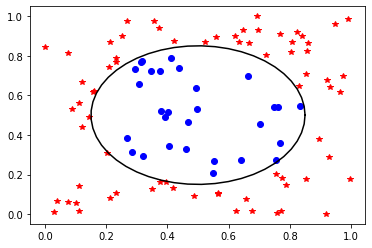

In [76]:
plt.plot(x[y==0,0],x[y==0,1],'r*') #plots all points with albels 0
plt.plot(x[y==1,0],x[y==1,1],'bo') #plots all points with labels 1
t = np.linspace(0,2*np.pi)
plt.plot(cx+r*np.cos(t),cy+r*np.sin(t),'k') #plots the separating circle

Vi antar att vi har 5 features, 1, $x_1$, $x_2$, $x_1^2$ och $x_2^2$.

Nu ska vi göre en logistisk regression. Vi har modellen 
$$f_{\omega_0,\omega_1,\omega_2}(x_1,x_2) = P(Y = 1|x,\vec{\omega}) = \frac{1}{1+e^{-(\omega_0 + \omega_1 x_1 + \omega_2 x_2)+\omega_3 x_1^2+\omega_4 x_2^2)}} = \frac{e^{(\omega_0 + \omega_1 x_1 + \omega_2 x_2)+\omega_3 x_1^2+\omega_4 x_2^2)}}{1+e^{(\omega_0 + \omega_1 x_1 + \omega_2 x_2)+\omega_3 x_1^2+\omega_4 x_2^2)}}$$
Och loss funktionen
$$L(f_{\omega_0,\omega_1,\omega_2}(x_1,x_2),y) = -y\log(f_{\omega_0,\omega_1,\omega_2}(x_1,x_2)) - (1-y)\log(1-f_{\omega_0,\omega_1,\omega_2}(x_1,x_2))$$
Så lossen för all våran data är
$$L = -\sum_{i=0}^N y^i\log(f_{\omega_0,\omega_1,\omega_2}(x^i_1,x^i_2)) + (1-y^i)\log(1-f_{\omega_0,\omega_1,\omega_2}(x^i_1,x^i_2))$$
Det är den här lossen vi vill minimera med någon metod. Alltså hitta de optimala parametrarna $\omega_0,\omega_1,\omega_2$

In [77]:
def f(x,w):
    """Output of the neural network, where w is the 3D vector containing the weights and x1 and x2 are the 
    input coordinates. Outputs a value in the range [0,1]. """
    a = w[0]+w[1]*x[0]+w[2]*x[1]+w[3]*x[0]**2+w[4]*x[1]**2;
    return 1/(1+np.exp(-a))

In [78]:
def loss(x,w,y):
    #log-loss or binary cross-entropy is used
    #Returns value -y*np.log(f(x1,x2,w))-(1-y)*np.log(1-f(x1,x2,w))
    if y == 1:
        return -np.log(f(x,w))
    else:
        return -np.log(1-f(x,w))

In [79]:
def total_loss(w):
    #This is the total log-loss from all training data.
    L = 0
    for i in range(N):
        L += loss(x[i,:],w,y[i])
    return L/N
    

Använder kedjeregeln så att vi kan utnyttja att $\frac{\partial L}{\partial w_i} = \frac{\partial L}{\partial f}\frac{\partial f}{\partial a}\frac{\partial a}{\partial w_i}$

In [80]:
def gradient_sample(w,x,y):
    #Computes the gradient with respect to one sample only by using backpropagation (the chain rule)
    
    #xvec = np.array([1,x[0],x[1]])
    #return xvec*(-y+1/(1+np.exp(w@xvec))) #Division by zero in log if this is used
    
    a = w[0]+w[1]*x[0]+w[2]*x[1]+w[3]*x[0]**2+w[4]*x[1]**2;
    dfda = np.exp(-a)/((1+np.exp(-a))**2)
    
    dadw = np.array([1,x[0],x[1],x[0]**2,x[1]**2])
    if y ==1:
        return -dfda*dadw/f(x,w)
    else:
        return dfda*dadw/(1-f(x,w))
    


In [81]:
def gradient(w,x = x,y=y):
    #Computes total gradient 
    g = 0
    for i in range(N):
        g = g+gradient_sample(w,x[i,:],y[i])
    return g

In [82]:
train_sessions = 100000
alpha = 0.5

w = np.random.normal(size = (5,))
SGD = 1
E = []

for i in range(train_sessions):
    #If training with gradient descent
    if not SGD:
        w = w-alpha*gradient(w,x,y)
    else:    
        #If training with SGD - can I choose the same sample multiple times?
        k = np.random.randint(0,N)
        w = w-alpha*gradient_sample(w,x[k,:],y[k])
    
    if i%N == 0:
        E.append(total_loss(w))

[-23.13212685  58.12660632  57.98419465 -56.32061379 -57.72327583]


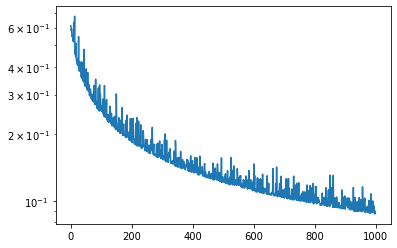

In [83]:
plt.figure()
plt.semilogy(E)
print(w)

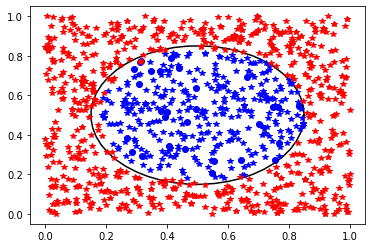

In [84]:
plt.figure()
plt.plot(x[y==0,0],x[y==0,1],'r*') #plots all points with albels 0
plt.plot(x[y==1,0],x[y==1,1],'bo') #plots all points with labels 1
plt.plot(cx+r*np.cos(t),cy+r*np.sin(t),'k') #plots the separating circle

#plt.plot([0,c/n[0]],[c/n[1],0]) #plots the separating hyperplane
#plt.plot([0,-w[0]/w[1]],[-w[0]/w[2],0],'g') #plots the trained hyperplane

#Evaluate with test data
np.random.seed(133)
M = 1000 #number of data points
x_test = np.random.uniform(0,1, size = (M,2))
y_test = np.zeros(shape = (M,))
for i in range(M):
    y_test[i] = f(x_test[i],w)
plt.plot(x_test[y_test>=0.5,0],x_test[y_test>=0.5,1],'b*') #plots all points with labels 1
plt.plot(x_test[y_test<0.5,0],x_test[y_test<0.5,1],'r*') #plots all points with labels 1

    